In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from IPython.display import clear_output
# NP Necessary imports

In [2]:
def starformingprob(radii, theta, formingstars):
    '''Function for determining the star formation rates based on probability
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    Inputs:
    radii: array. An array of radial distances for each star. Float.
    theta: array. An array of the angular distances for each star. Float.
    formingstars: array. An array of indicating wheter each point is forming
    stars. Boolean.
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    Outputs:
    null. Updates the formingstars array.'''
    sfr = random.random(2000)
    # NP Generating 1000 numbers randomly
    sto = np.array(np.repeat(0, 2000), dtype = float)
    for i in range(len(sfr)-1):
        ii = ((radii[i]*np.cos(theta[i]) -radii*np.cos(theta))**2 \
            +(radii[i]*np.sin(theta[i]) -radii*np.sin(theta))**2)\
            **0.5 < 1
        # NP Finding stars that are closer than 1 Mpc from each star
        if(formingstars[ii].any()):
            sto[i] = random.random()
            # NP If there is a nearby star that is actively undergoing star
            # NP formation, then there is a chance that this star will form stars
    i2 = ((sfr >= 0.95) | (sto > 0.5)) & (ages < 50)
    formingstars[i2] = True
    # NP 5% chance that the star will randomly start forming stars and 5% chance
    # NP that the star will for stars if there are nearby forming stars if the
    # NP star cluster is less inactive
    i3 = (ages >= 50) & (ages < 100)
    formingstars[i3] = False
    # NP Once the star is old enough, it dies and is unable to form new stars for a
    # NP while
    i4 = (ages >= 100)
    ages[i4] = 0
    # NP After 100 Myrs, then the star cluster restarts and can form stars again

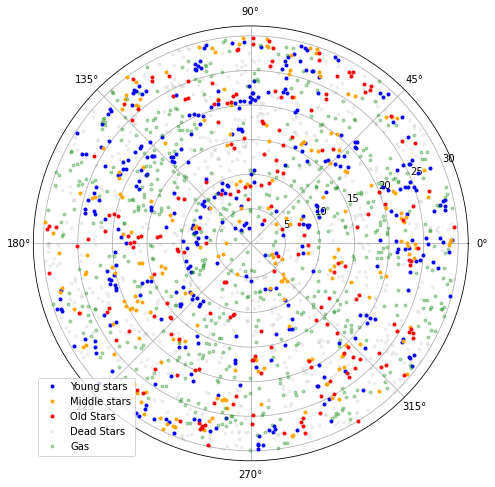

365 young stars
213 middle stars
197 old stars
641 dead stars
584 nebulae
1000 million years old


In [13]:
t = 0
# NP Starting at time 0 years
timestep = 5
# NP Every loop is 5 million years
formingstars = np.repeat(False, 2000)
theta = random.random(2000) *2 *np.pi
radii = (random.random(2000)**(1/2)) *30
ages = np.repeat(0, 2000)
# NP Creating all starting information
while(t < 1001):
    young = formingstars & (ages <= 16)
    middle = formingstars & (ages < 33) & (ages > 16)
    old = formingstars & (ages >= 33) & (ages < 50)
    dead = ages >= 50
    # NP Defining classification of stars based on age
    ages[young | middle | old | dead] += timestep
    # NP Increasing age of all star groups
    clear_output(wait=True)
    # NP Clearing any previous graphics
    f = plt.figure()
    f.set_figwidth(8)
    f.set_figheight(8)
    # NP Making figure larger
    plt.polar(theta[young], radii[young], '.b', alpha = 1, label = 'Young stars')
    plt.polar(theta[middle], radii[middle], '.', color = 'orange', label = 'Middle stars')
    plt.polar(theta[old], radii[old], '.r', label = 'Old Stars')
    plt.polar(theta[dead], radii[dead], '.k', alpha = .05, label = 'Dead Stars')
    plt.polar(theta[~formingstars & ~dead], radii[~formingstars & ~dead],'.g', alpha = .3, label = 'Gas')
    # NP Plotting all stars
    plt.legend(loc = 'lower left')
    # NP Displaying legend
    plt.grid(True)
    plt.show()
    # NP Displaying graph
    # NP Increasing time
    theta = theta +(1/(radii))
    # NP Increasing angular position with constant velocity
    print(str(len(theta[young])) +' young stars')
    print(str(len(theta[middle])) +' middle stars')
    print(str(len(theta[old])) +' old stars')
    print(str(len(theta[dead])) +' dead stars')
    print(str(len(theta[~formingstars & ~dead])) +' nebulae')
    print(str(t)+' million years old')
    # NP Displaying relevant information for the simulation
    starformingprob(radii, theta, formingstars)
    t += timestep
    # NP Running star formation function
    time.sleep(.5)